# Estadísticos de Validación de un Modelo de Clasificación Supervisada

## Introducción

En el campo del aprendizaje automático, la clasificación supervisada es una tarea fundamental que implica predecir la etiqueta de categoría de nuevas observaciones basándose en un conjunto de datos de entrenamiento etiquetado. Una parte crucial del desarrollo y evaluación de estos modelos es la validación, que nos permite estimar qué tan bien el modelo se desempeñará en el mundo real. La validación de modelos incluye una serie de estadísticos que proporcionan diversas perspectivas sobre la eficacia del modelo, como la exactitud, la precisión, la sensibilidad, entre otros. Estos estadísticos nos ayudan a comprender las fortalezas y debilidades de nuestro modelo, permitiéndonos realizar mejoras dirigidas y tomar decisiones informadas sobre su implementación.

La capacidad de un modelo para generalizar es esencial; sin embargo, no es raro encontrar modelos que, aunque muestran un alto rendimiento durante la fase de entrenamiento, fracasan al ser expuestos a nuevos datos. Esto puede deberse a fenómenos como el sobreajuste, donde el modelo aprende patrones específicos del conjunto de entrenamiento que no son generalizables. Por lo tanto, utilizar una metodología de validación rigurosa y comprender los estadísticos que evaluamos son pasos cruciales en el ciclo de vida del desarrollo de modelos.

## Matriz de Confusión

Uno de los instrumentos más básicos, pero poderosos, para evaluar el rendimiento de los modelos de clasificación es la matriz de confusión. Esta matriz es una tabla que permite la visualización del desempeño del modelo al mostrar las frecuencias de las predicciones en cada categoría, comparadas con las etiquetas reales. Las dimensiones de la matriz varían según el número de clases que el modelo intenta predecir.

La estructura de la matriz de confusión es la siguiente:

- **Verdaderos Positivos (VP)**: El modelo predijo correctamente la clase positiva.
- **Falsos Positivos (FP)**: El modelo predijo incorrectamente una clase como positiva cuando es negativa.
- **Verdaderos Negativos (VN)**: El modelo predijo correctamente la clase negativa.
- **Falsos Negativos (FN)**: El modelo predijo incorrectamente una clase como negativa cuando es positiva.

La matriz de confusión se ve típicamente así para un problema de clasificación binaria:

|                   | Predicción Positiva | Predicción Negativa |
|-------------------|---------------------|---------------------|
| **Clase Positiva** | Verdaderos Positivos (VP) | Falsos Negativos (FN) |
| **Clase Negativa** | Falsos Positivos (FP)    | Verdaderos Negativos (VN) |

A partir de esta matriz, se pueden derivar varios estadísticos que nos proporcionan una comprensión más profunda del rendimiento del modelo. Estos incluyen medidas de la capacidad del modelo para identificar correctamente las clases positivas (sensibilidad), su precisión en la clasificación de ejemplos positivos (precisión), y la tasa a la que identifica correctamente las clases negativas (especificidad), entre otros.

La matriz de confusión sirve como base para calcular muchos de los estadísticos de validación más utilizados en la clasificación supervisada, permitiéndonos realizar una evaluación comprensiva y equilibrada del modelo.

En las siguientes secciones, profundizaremos en los estadísticos específicos derivados de la matriz de confusión y discutiremos cómo cada uno de ellos contribuye a una comprensión holística del rendimiento de un modelo de clasificación supervisada.

In [1]:
## Cargamos los datos cancer de sklearn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
import pandas as pd

df_cancer= pd.DataFrame(data=cancer['data'],columns=cancer['feature_names'])

df_cancer['Cancer?']=cancer['target']

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer?
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer?
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df_cancer['Cancer?'].value_counts()

Cancer?
1    357
0    212
Name: count, dtype: int64

In [66]:
X=df_cancer.drop('Cancer?',axis=1)
y=df_cancer['Cancer?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Escalamos los datos
scaler = StandardScaler()
model = LogisticRegression(max_iter=100)

pipeline = Pipeline([('model',model)])

pipeline

Pipeline(steps=[('model', LogisticRegression())])

In [67]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
178,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.321900,0.110800,0.2827,0.09208
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.129300,0.081230,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.13680,0.42900,0.358700,0.183400,0.3698,0.10940
514,15.050,19.07,97.26,701.9,0.09215,0.08597,0.074860,0.043350,0.1561,0.05915,...,17.58,28.06,113.80,967.0,0.12460,0.21010,0.286600,0.112000,0.2282,0.06954
548,9.683,19.34,61.05,285.7,0.08491,0.05030,0.023370,0.009615,0.1580,0.06235,...,10.93,25.59,69.10,364.2,0.11990,0.09546,0.093500,0.038460,0.2552,0.07920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,0.1539,0.05637,...,13.87,36.00,88.10,594.7,0.12340,0.10640,0.086530,0.064980,0.2407,0.06484
393,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.281000,0.156200,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.15020,0.57170,0.705300,0.242200,0.3828,0.10070
75,16.070,19.65,104.10,817.7,0.09168,0.08424,0.097690,0.066380,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.15000,0.20450,0.282900,0.152000,0.2650,0.06387
337,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.060900,0.1953,0.06083,...,24.54,34.37,161.10,1873.0,0.14980,0.48270,0.463400,0.204800,0.3679,0.09870


In [68]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
107,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,19.92,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
319,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,...,13.07,26.98,86.43,520.5,0.12490,0.19370,0.25600,0.06664,0.3035,0.08284
279,13.85,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,0.2110,0.05853,...,14.98,21.74,98.37,670.0,0.11850,0.17240,0.14560,0.09993,0.2955,0.06912
390,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,0.1800,0.06569,...,11.38,15.65,73.23,394.5,0.13430,0.16500,0.08615,0.06696,0.2937,0.07722
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828


In [69]:
#### Entrenamos el modelo

pipeline.fit(X_train,y_train)

### Evaluamos el modelo

y_test_pred = pipeline.predict(X_test)

/home/isaac-zainea/miniconda3/envs/proyecto_final/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
y_test

107    1
437    1
195    1
141    0
319    1
      ..
420    1
279    1
390    1
91     0
297    0
Name: Cancer?, Length: 171, dtype: int64

In [71]:
### TESTEO VS PREDICCION

df_cancer_test = pd.DataFrame()

df_cancer_test['Real']=y_test
df_cancer_test['Prediccion']=y_test_pred

df_cancer_test

,Real,Prediccion
107,1,1
437,1,1
195,1,1
141,0,0
319,1,1
...,...,...
420,1,1
279,1,1
390,1,1
91,0,1


In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_test_pred)


array([[ 57,   9],
       [  4, 101]])

In [73]:
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print(tn, fp, fn, tp)

57 9 4 101


## Estadísticos de Validación

### Exactitud (Accuracy)

La exactitud es la proporción de predicciones correctas (tanto positivas como negativas) entre el total de casos examinados. Se calcula con la fórmula:

$$ \text{Exactitud} = \frac{VP + VN}{VP + FN + FP + VN} $$

En scikit-learn, la exactitud se puede calcular fácilmente usando la función `accuracy_score`:

```python
from sklearn.metrics import accuracy_score

# y_true son las etiquetas verdaderas, y y_pred son las etiquetas predichas por el modelo
exactitud = accuracy_score(y_true, y_pred)
print(f"Exactitud: {exactitud}")
```

In [74]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test,y_test_pred)

exactitud

0.9239766081871345

In [75]:
149/171

0.8713450292397661

### Precisión (Precision)

La precisión mide la proporción de predicciones positivas correctas en relación con el total de predicciones positivas. Su fórmula es:

$$ \text{Precisión} = \frac{VP}{VP + FP} $$

Para calcular la precisión en scikit-learn:

```python
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
print(f"Precisión: {precision}")
```

In [76]:
from sklearn.metrics import precision_score

precision = precision_score(y_test,y_test_pred)

precision

0.9181818181818182

### Sensibilidad (Recall) o Tasa de Verdaderos Positivos

La sensibilidad, también conocida como recall o tasa de verdaderos positivos, mide la proporción de positivos reales que fueron identificados correctamente por el modelo. Se calcula con:

$$ \text{Sensibilidad} = \frac{VP}{VP + FN} $$

En scikit-learn, el recall se puede calcular con la función `recall_score`:

```python
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_true, y_pred)
print(f"Sensibilidad: {sensibilidad}")
```

In [77]:
from sklearn.metrics import recall_score

recall = recall_score(y_test,y_test_pred)

recall

0.9619047619047619

### Valor F1

El valor F1 es el promedio armónico de la precisión y la sensibilidad, ofreciendo un balance entre ellos. Es especialmente útil cuando las clases son desbalanceadas. Se calcula con:

$$ \text{Valor F1} = 2 \cdot \frac{\text{Precisión} \cdot \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}} $$

Para calcular el valor F1 en scikit-learn:

```python
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print(f"Valor F1: {f1}")
```

In [78]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,y_test_pred)

f1

0.9395348837209302





### Curva Precision-Recall y el Área Bajo la Curva (PR-AUC)

La curva Precision-Recall muestra la relación entre la precisión del modelo (su capacidad para no etiquetar como positivo un negativo) y su sensibilidad (su capacidad para encontrar todos los positivos) a lo largo de diferentes umbrales. El área bajo esta curva (PR-AUC) puede ser un indicador del rendimiento general del modelo, especialmente en casos de clases desbalanceadas.

Para trazar la curva Precision-Recall y calcular el PR-AUC en scikit-learn:

```python
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Asumiendo que y_scores son las puntuaciones de decisión o probabilidades de clase positiva
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.', label=f'PR-AUC: {pr_auc}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Curva Precision-Recall')
plt.show()
```

Estos estadísticos proporcionan una comprensión profunda del rendimiento de los modelos de clasificación supervisada. Al analizarlos en conjunto, podemos obtener una vista holística de las fortalezas y debilidades del modelo, permitiéndonos hacer ajustes informados y mejorar nuestra capacidad de predicción.

In [79]:
y_test_pred_proba = pipeline.predict_proba(X_test)
y_test_pred_proba[:,1]

array([9.92031306e-01, 9.22076343e-01, 9.95097127e-01, 4.21521762e-05,
       9.99425159e-01, 9.98719092e-01, 9.98899473e-01, 5.21900676e-09,
       9.89877717e-01, 9.98686155e-01, 1.07501239e-01, 9.87515261e-01,
       8.98563548e-01, 9.96179967e-01, 1.51297509e-04, 9.53305571e-01,
       9.95368978e-01, 9.98481410e-01, 1.39659465e-17, 8.60074759e-01,
       9.66299024e-01, 9.94130660e-01, 9.77239769e-01, 9.98991655e-01,
       2.32736822e-03, 9.58841725e-01, 1.88976807e-03, 9.99930621e-01,
       2.98060816e-05, 2.32969481e-01, 9.96772406e-01, 2.77968926e-01,
       9.08761484e-01, 2.13402663e-03, 9.99678735e-01, 9.99071091e-01,
       1.45207804e-04, 8.27591017e-01, 1.11716720e-09, 1.26380398e-17,
       1.82077994e-03, 9.97112017e-01, 9.88832986e-01, 7.77666196e-01,
       9.99245933e-01, 9.97561006e-01, 1.22940369e-09, 3.68215538e-01,
       9.01773337e-01, 9.96816575e-01, 9.28035278e-06, 5.79506454e-01,
       9.58481765e-01, 1.10172516e-10, 9.94686430e-01, 9.98765338e-01,
      

In [63]:
max(y_test_pred_proba[:,1] )

0.999940705289232

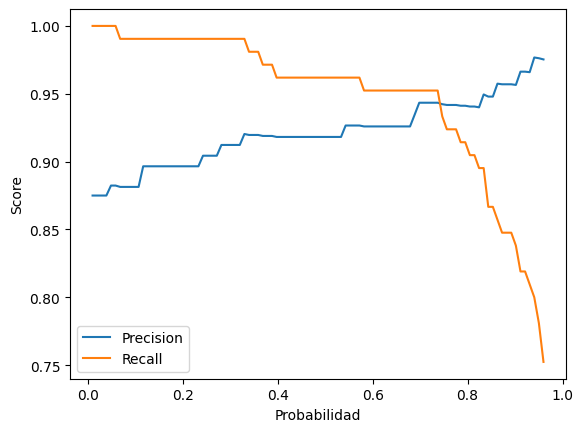

In [80]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred_proba[:,1])

import matplotlib.pyplot as plt

probabilidades = np.linspace(0.01,max(y_test_pred_proba[:,1]-0.04),99)

precisiones = []
recalls = []

for prob in probabilidades:
    y_test_pred = y_test_pred_proba[:,1]>prob
    precisiones.append(precision_score(y_test,y_test_pred))
    recalls.append(recall_score(y_test,y_test_pred))


plt.plot(probabilidades,precisiones,label='Precision')
plt.plot(probabilidades,recalls,label='Recall')
plt.xlabel('Probabilidad')
plt.ylabel('Score')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import classification_report

y_pred = y_test_pred_proba[:,1]>0.5

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90        66
           1       0.92      0.96      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

[[ 57   9]
 [  4 101]]


In [83]:
y_pred = y_test_pred_proba[:,1]>0.7

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.94      0.95      0.95       105

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[ 60   6]
 [  5 100]]


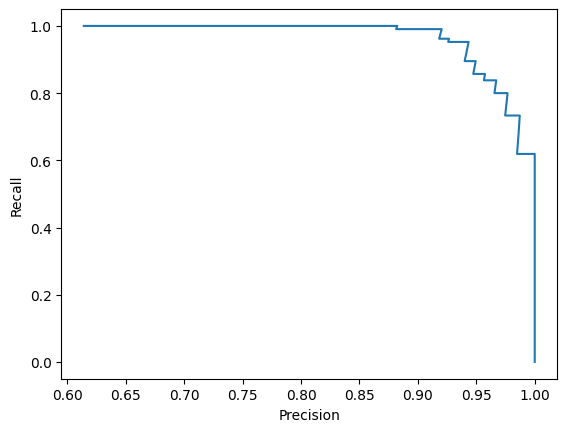

In [81]:
precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred_proba[:,1])

plt.plot(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()



In [84]:
from sklearn.metrics import auc

auc(recall,precision)

0.9852606321267868

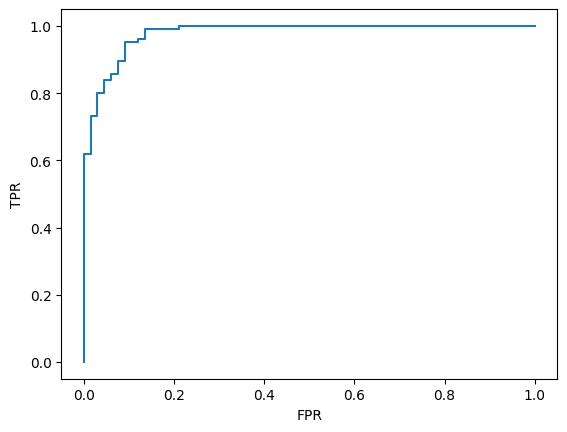

In [85]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_test_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [86]:
auc(fpr,tpr)

0.9782106782106782

```{note}
Este contenido se enfoca en estadísticos de validación para problemas de clasificación binaria, pero la mayoría de ellos se pueden extender a problemas de clasificación multiclase.
```

## Multiclase

Para problemas de clasificación multiclase, la matriz de confusión y los estadísticos derivados de ella se extienden para acomodar múltiples clases. La matriz de confusión para un problema de clasificación multiclase tiene la siguiente estructura:

|                   | Predicción Clase 1 | Predicción Clase 2 | ... | Predicción Clase N |
|-------------------|--------------------|--------------------|-----|--------------------|
| **Clase Real 1**  | VP1                | FN1                | ... | FN1                |
| **Clase Real 2**  | FP2                | VP2                | ... | FN2                |
| ...               | ...                | ...                | ... | ...                |
| **Clase Real N**  | FP_N               | FP_N               | ... | VN_N               |

A partir de esta matriz, se pueden calcular estadísticos como la exactitud, la precisión, la sensibilidad y el valor F1 para cada clase, así como estadísticos agregados que proporcionan una visión general del rendimiento del modelo.

En scikit-learn, la función `classification_report` proporciona un resumen detallado de estos estadísticos para problemas de clasificación multiclase:

```python
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))
```

```{note}	
Estas métricas son útiles para evaluar el rendimiento de un modelo de clasificación supervisada, pero no son los únicos factores a considerar. Es importante tener en cuenta el contexto del problema y las necesidades específicas del negocio al seleccionar las métricas de evaluación.
```
